#CSE 5334, Falll 2023, University of Texas at Arlington
#  Clustering


## **Academic Honesty**
This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated.

## **Requirements**

1.   When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab.

2.  To submit your assignment, download your Colab into a .ipynb file. This
can be done using the option `Download > Download .ipynb` in Google Colab. Submit the downloaded .ipynb file/ .zip into the Programming Assignment 4 entry in Canvas.


## **Description**

Iris Data Set:
A dataset containing information about different types of flowers. Each flower is described using four features - sepal length, sepal width, petal length, and petal width. The dataset contains 150 samples, with 50 samples for each of the three species of flowers - Iris setosa, Iris virginica, and Iris versicolor.





## **Tasks to Code**
1.  Load the dataset using Python libraries such as Pandas and Numpy.
2.   Visualize the dataset using scatter plots to see if there are any natural clusters in the data.
3. Preprocess the data by scaling it to ensure that all the features are on the same scale.  
4.Use the KMeans algorithm to cluster the data into three clusters, one for each type of flower.
5.  Visualize the clusters using scatter plots and color-coding to see how well the algorithm was able to separate the different types of flowers.
6. Evaluate the quality of the clustering using metrics such as the silhouette score.
7.  Experiment with different values of K (the number of clusters) to see how it affects the quality of the clustering.
8.   Implement hierarchical clustering and compare the results with KMeans.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering



In [ ]:
#Task1-code

data = drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/iris.csv")

df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


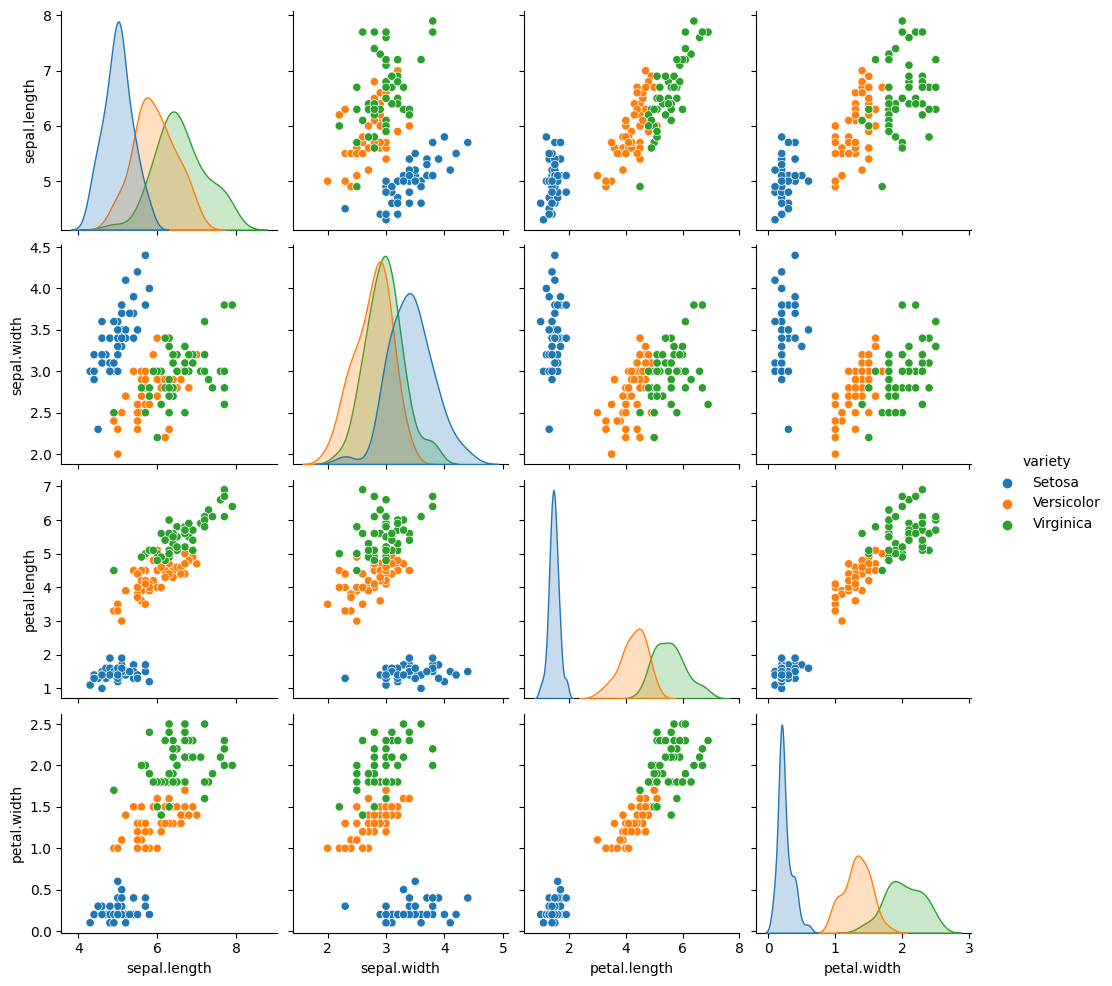

In [ ]:
#Task2-code

sns.pairplot(df, hue="variety")

In [ ]:
#Task3-code

df.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


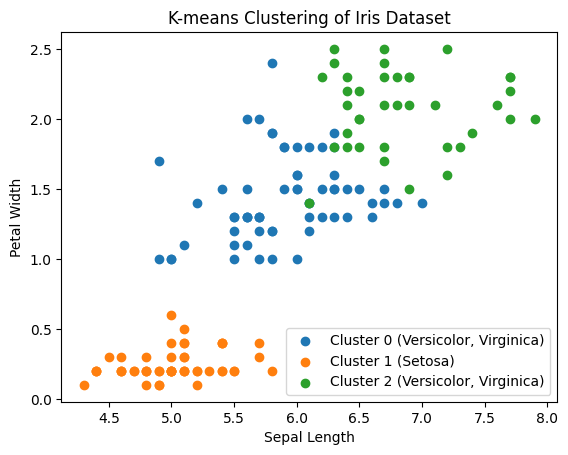

In [ ]:
#Task4-code

data = df.drop('variety', axis=1)
target = df['variety']

# Encode the categorical target variable into numerical values
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Perform KMeans clustering with 3 clusters on the features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Mapping cluster labels to variety classes
cluster_variety_mapping = {}
for cluster in range(3):
    variety_in_cluster = target.iloc[cluster_labels == cluster].unique()
    cluster_variety_mapping[cluster] = variety_in_cluster

# Visualizing the clusters based on two features (sepal length and petal width, for example)
for cluster in range(3):
    variety = ', '.join(cluster_variety_mapping[cluster])
    plt.scatter(df['sepal.length'][cluster_labels == cluster],
                df['petal.width'][cluster_labels == cluster],
                label=f'Cluster {cluster} ({variety})')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()

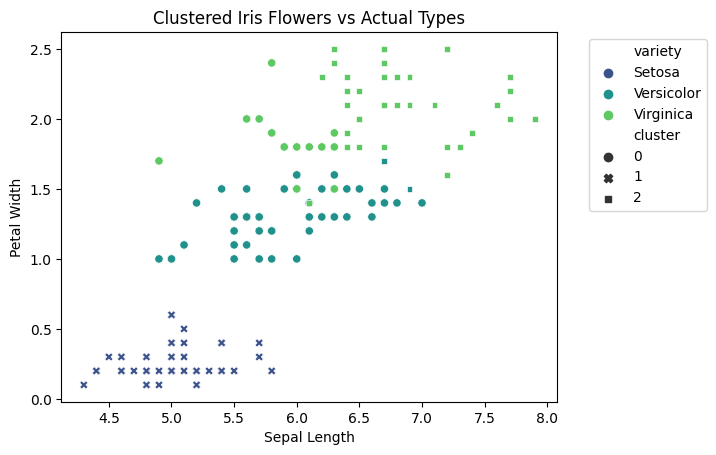

In [ ]:
#Task5-code

cluster_labels = kmeans.labels_

# Add cluster labels and actual variety to the DataFrame for comparison
df['cluster'] = cluster_labels

# Visualizing the clusters against actual flower types
sns.scatterplot(x='sepal.length', y='petal.width', hue='variety', style='cluster', data=df, palette='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Clustered Iris Flowers vs Actual Types')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#Task6-code

silhouette = silhouette_score(data, cluster_labels)

print(f"The silhouette score is: {silhouette}")



The silhouette score is: 0.5528190123564102


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

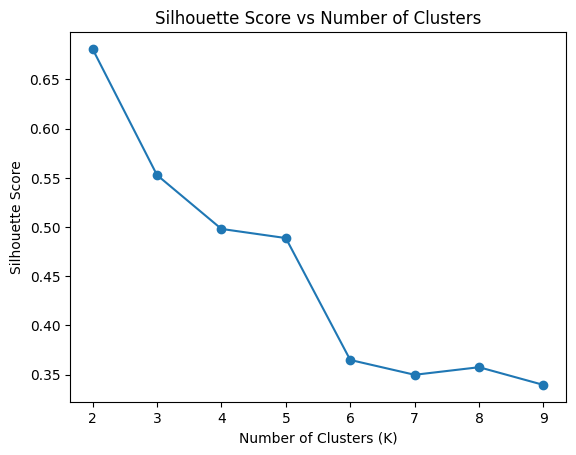

In [ ]:
#Task7-code

k_values = range(2, 10)  # Experimenting with K values from 2 to 9

silhouette_scores = []

# Iterate over different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Calculate silhouette score for each K
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores for different K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(k_values)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

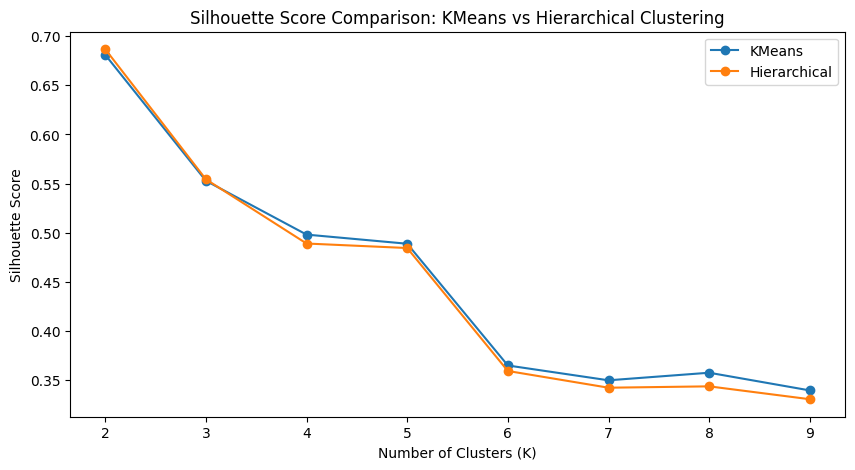

In [ ]:
#Task8-code

k_values = range(2, 10)  # Experimenting with K values from 2 to 9

silhouette_scores_kmeans = []
silhouette_scores_hierarchical = []

# Iterate over different values of K for KMeans
for k in k_values:
    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels_kmeans = kmeans.fit_predict(data)
    silhouette_avg_kmeans = silhouette_score(data, cluster_labels_kmeans)
    silhouette_scores_kmeans.append(silhouette_avg_kmeans)

    # Hierarchical (Agglomerative) clustering
    hierarchical = AgglomerativeClustering(n_clusters=k)
    cluster_labels_hierarchical = hierarchical.fit_predict(data)
    silhouette_avg_hierarchical = silhouette_score(data, cluster_labels_hierarchical)
    silhouette_scores_hierarchical.append(silhouette_avg_hierarchical)

# Plotting the silhouette scores for KMeans and Hierarchical clustering
plt.figure(figsize=(10, 5))

plt.plot(k_values, silhouette_scores_kmeans, marker='o', label='KMeans')
plt.plot(k_values, silhouette_scores_hierarchical, marker='o', label='Hierarchical')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison: KMeans vs Hierarchical Clustering')
plt.xticks(k_values)
plt.legend()
plt.show()

